In [1]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import numpy as np
import tensorflow as tf

2024-07-27 23:05:19.623934: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-27 23:05:20.661968: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-27 23:05:20.951707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 23:05:21.535604: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 23:05:21.692589: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-27 23:05:22.719267: I tensorflow/core/platform/cpu_feature_gu

In [2]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [3]:
def read_stock_csv(stock: str, filename: str = "") -> pd.DataFrame:
    """
    Loads the stock-price data from a csv file obtained from yahoo finance
    Retains only the date, which is set as the index, and the closing price
    """
    if not filename:
        filename = f"./data/{stock}.csv"
    df = pd.read_csv(filename)[["Date", "Close"]]
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)
    df.rename(columns={"Close": stock}, inplace=True)
    return df

In [4]:
df_sp500_3_years = read_stock_csv(
    stock="SPX", filename="../../submissions/Capstone/data/SPX_3_years.csv"
)[::-1]
df_sp500_3_years["SPX"] = df_sp500_3_years["SPX"].str.replace(",", "").apply(float)
df_sp500_3_years

,SPX
Date,
2021-07-12,4384.63
2021-07-13,4369.21
2021-07-14,4374.30
2021-07-15,4360.03
2021-07-16,4327.16
...,...
2024-07-08,5572.85
2024-07-09,5576.98
2024-07-10,5633.91


In [5]:
import matplotlib.pyplot as plt

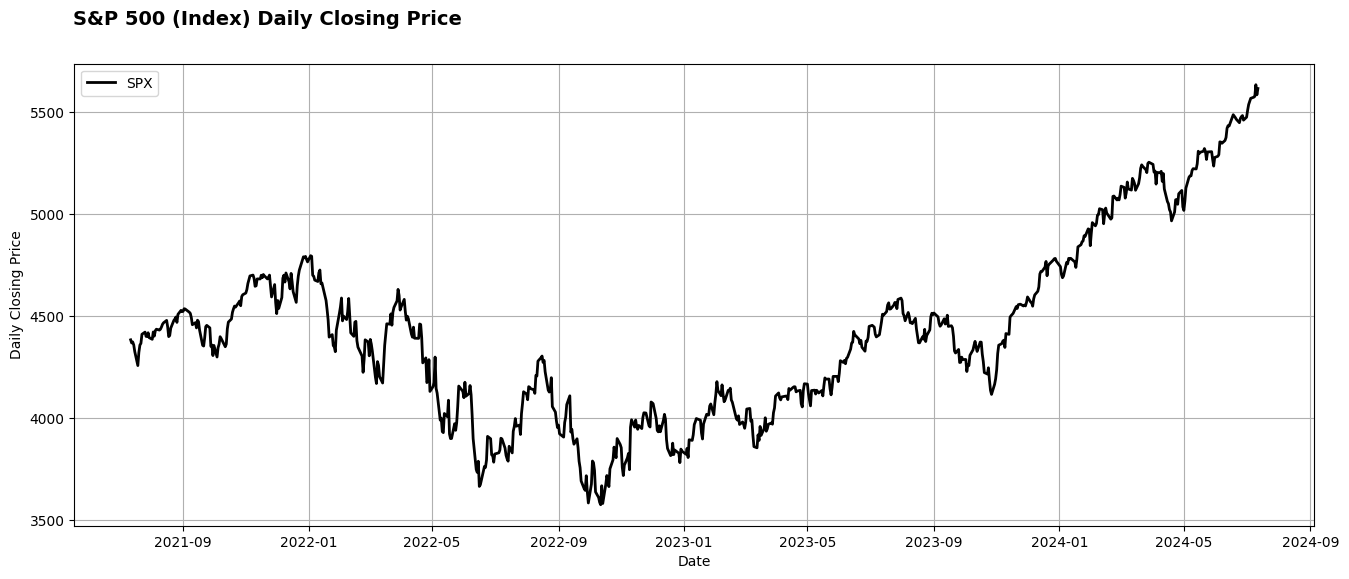

In [6]:
plt.figure(figsize=(16, 6))
column = "SPX"
plt.plot(
    df_sp500_3_years[column],
    lw=2,
    color="black",
    label=column,
)
plt.grid(True)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Daily Closing Price")
plt.suptitle(
    "S&P 500 (Index) Daily Closing Price",
    fontsize=14,
    fontweight="bold",
    x=0.124,
    y=0.97,
    ha="left",
)
plt.show()

In [7]:
import numpy as np

In [8]:
def build_window(data, h, f):
    dataX, dataY = [], []
    for i in range(len(data) - h - f):
        dataX.append(data[i : (i + h)])
        dataY.append(data[(i + h) : (i + h + f)])
    dataX = np.array(dataX)
    dataY = np.array(dataY)
    return dataX, dataY

In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [83]:
data = df_sp500_3_years["SPX"].copy().values.reshape(-1, 1)
mm = MinMaxScaler().fit(data)
data = mm.transform(data).reshape(
    -1,
)
data.shape

(756,)

In [89]:
# mm.inverse_transform(data.reshape(-1, 1))

In [85]:
n_days_train, n_days_forecast = 5, 1

In [90]:
dataX, dataY = build_window(data, h=n_days_train, f=n_days_forecast)
[
    dataX.shape,
    dataY.shape,
]

[(750, 5), (750, 1)]

In [91]:
n_train = int(0.8 * dataY.shape[0])
trainX, trainY = dataX[:n_train, :], dataY[:n_train, :]
testX, testY = dataX[n_train:, :], dataY[n_train:, :]
[
    trainX.shape,
    trainY.shape,
    testX.shape,
    testY.shape,
]

[(600, 5), (600, 1), (150, 5), (150, 1)]

In [14]:
def insert_singleton(X):
    return np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [92]:
trainX_ss = insert_singleton(trainX)
testX_ss = insert_singleton(testX)
[
    trainX_ss.shape,
    testX_ss.shape,
]

[(600, 1, 5), (150, 1, 5)]

In [93]:
pd.DataFrame(trainX)

,0,1,2,3,4
0,0.392634,0.385137,0.387611,0.380674,0.364693
1,0.385137,0.387611,0.380674,0.364693,0.331308
2,0.387611,0.380674,0.364693,0.331308,0.362700
3,0.380674,0.364693,0.331308,0.362700,0.380022
4,0.364693,0.331308,0.362700,0.380022,0.384296
...,...,...,...,...,...
595,0.471758,0.467290,0.476250,0.477573,0.473241
596,0.467290,0.476250,0.477573,0.473241,0.475409
597,0.476250,0.477573,0.473241,0.475409,0.473314
598,0.477573,0.473241,0.475409,0.473314,0.481686


In [94]:
pd.DataFrame(testX)

,0,1,2,3,4
0,0.475409,0.473314,0.481686,0.494730,0.482648
1,0.473314,0.481686,0.494730,0.482648,0.481384
2,0.481686,0.494730,0.482648,0.481384,0.472711
3,0.494730,0.482648,0.481384,0.472711,0.490335
4,0.482648,0.481384,0.472711,0.490335,0.499465
...,...,...,...,...,...
145,0.926568,0.915683,0.922786,0.939277,0.952895
146,0.915683,0.922786,0.939277,0.952895,0.967563
147,0.922786,0.939277,0.952895,0.967563,0.970314
148,0.939277,0.952895,0.967563,0.970314,0.972322


In [16]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [95]:
tf.random.set_seed(42)
model = Sequential(
    [
        LSTM(32, input_shape=(1, n_days_train)),
        Dense(n_days_forecast),
    ]
)

model.compile(loss="mse", metrics=["mse"])
history = model.fit(
    trainX_ss,
    trainY,
    epochs=100,
    batch_size=32,
    verbose=False,
    validation_data=(testX_ss, testY),
)

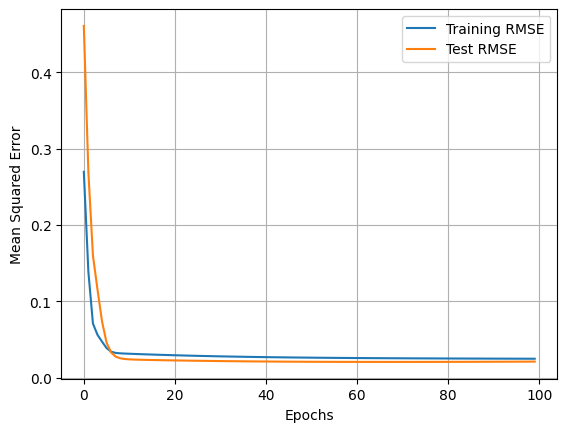

In [96]:
plt.plot(np.sqrt(history.history["mse"]), label="Training RMSE")
plt.plot(np.sqrt(history.history["val_mse"]), label="Test RMSE")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)

In [25]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [113]:
trainY_hat = model.predict(trainX_ss)
[
    trainY[:10],
    trainY_hat[:10],
]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step


[array([[0.33130761],
        [0.36269982],
        [0.38002217],
        [0.38429563],
        [0.40583797],
        [0.41094765],
        [0.4008158 ],
        [0.40041714],
        [0.4094162 ],
        [0.39780152]]),
 array([[0.36067247],
        [0.33178326],
        [0.3454714 ],
        [0.36686954],
        [0.37587652],
        [0.39217457],
        [0.4014967 ],
        [0.3956242 ],
        [0.39205465],
        [0.3982888 ]], dtype=float32)]

In [112]:
pd.DataFrame(
    [
        trainY.reshape(
            -1,
        ),
        trainY_hat.reshape(
            -1,
        ),
    ]
).transpose()

,0,1
0,0.331308,0.360672
1,0.362700,0.331783
2,0.380022,0.345471
3,0.384296,0.366870
4,0.405838,0.375877
...,...,...
595,0.475409,0.465955
596,0.473314,0.466127
597,0.481686,0.465136
598,0.494730,0.470799


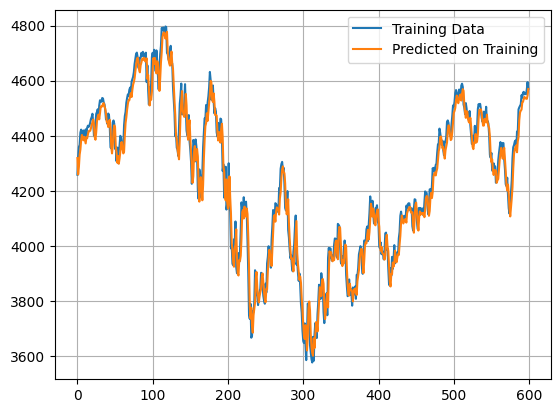

In [103]:
plt.plot(mm.inverse_transform(trainY.reshape(-1, 1)), label="Training Data")
plt.plot(mm.inverse_transform(trainY_hat.reshape(-1, 1)), label="Predicted on Training")
plt.legend()
plt.grid()